# 2022-1 제 1회 인사이콘 : HR Analytics - How to reduce Employee Turnover?

## Dataset
1. **WA_Fn-UseC_-HR-Employee-Attrition.csv**
- HR 데이터가 담겨있는 데이터셋입니다. **해당 파일의 데이터를 이용해서 EDA 및 Feature Engineering을 진행합니다.**
2. **WA_Fn-UseC_-HR-Employee-Attrition.xlsx**
- sheet 1: HR 데이터의 가독성을 위해 정리된 시트입니다. csv 파일과 동일한 내용입니다.
- sheet 2(Variable Dictionary): 각 변수들에 대한 설명이 담겨있습니다.

## General Guideline:

주어진 HR 데이터를 통해 **종업원 퇴사의 주된 원인을 탐색 및 시각화하여, 경영진에게 인사이트 및 문제에 대한 해결방안을 도출하는** case 입니다.

권장하는 진행 순서는 다음과 같습니다.

1. **EDA + Feature Engineering**
- 데이터에 대한 EDA 및 Feature Engineering을 진행하여 활용할 Feature들을 확정합니다. 
2. **Interpretation**
- Employee Turnover에 영향을 미치는 변인과 그 관계를 탐색 및 해석합니다.
3. **Insight**
- 분석 결과를 바탕으로 인사이트를 도출하여, 경영진에게 Employee Turnover 제고 전략을 제시합니다.
4. **presentation**
- 주피터 노트북 or 노션 페이지로 자료를 정리 및 발표합니다.

# EDA + Feature Processing

EDA 및 Feature Processing을 진행하고, 활용할 Feature들을 확정합니다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# 활용할 최종 Feature 확정
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [2]:
col=["Attrition",'Gender','BusinessTravel','Department','JobInvolvement','JobLevel',
     'JobRole','OverTime','PerformanceRating']


In [137]:
for i in col:
    print(data[i].value_counts().to_frame())
    print()

   Attrition
0       1233
1        237

        Gender
Male       882
Female     588

                   BusinessTravel
Travel_Rarely                1043
Travel_Frequently             277
Non-Travel                    150

                        Department
Research & Development         961
Sales                          446
Human Resources                 63

   JobInvolvement
3             868
2             375
4             144
1              83

   JobLevel
1       543
2       534
3       218
4       106
5        69

                           JobRole
Sales Executive                326
Research Scientist             292
Laboratory Technician          259
Manufacturing Director         145
Healthcare Representative      131
Manager                        102
Sales Representative            83
Research Director               80
Human Resources                 52

   OverTime
0      1054
1       416

   PerformanceRating
3               1244
4                226



# Feature 분석/시각화

## Department

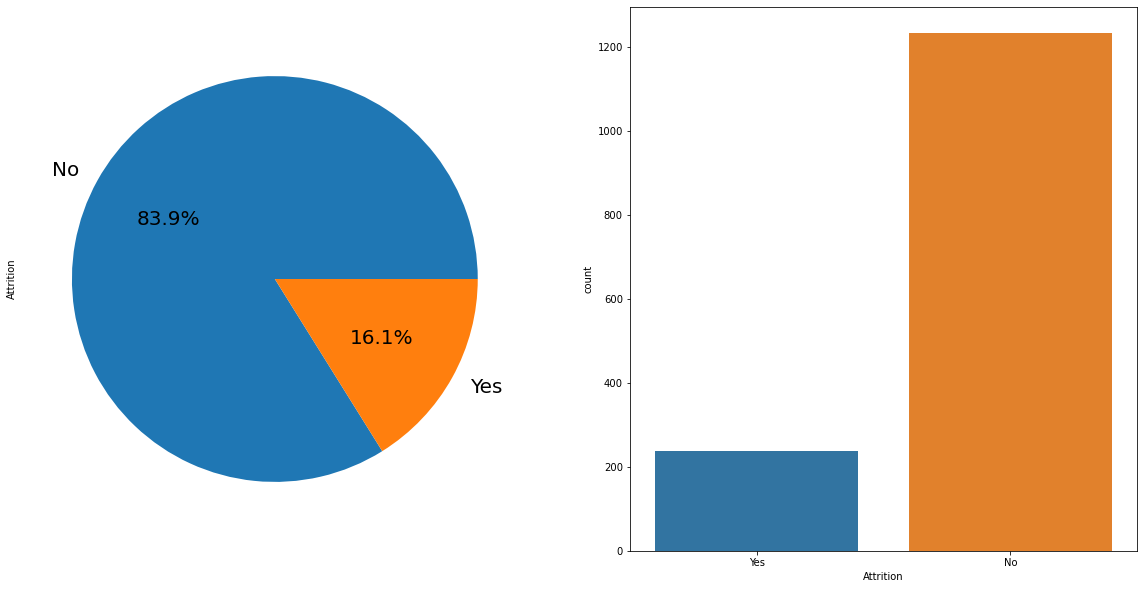

In [4]:

f, ax= plt.subplots(1,2,figsize=(20,10))

data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         fontsize=20)

sns.countplot("Attrition", data=data, ax=ax[1])
plt.show()



In [5]:
data["Attrition"].replace('Yes',1,inplace=True)
data["Attrition"].replace('No',0,inplace=True)
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

0: 미퇴직자. 1: 퇴직자

회사원 중 퇴사자 비율은 16.1%로 237명<br> 재직 비율은 83.9%로 1233명이다.

In [134]:
data.groupby(['Department','Attrition'])['Attrition'].count().to_frame()

Attrition
Department             Attrition           
Human Resources        0                 51
                       1                 12
Research & Development 0                828
                       1                133
Sales                  0                354
                       1                 92

In [135]:
data.groupby(['Department','Gender'])['Gender'].count().to_frame()

Gender
Department             Gender        
Human Resources        Female      20
                       Male        43
Research & Development Female     379
                       Male       582
Sales                  Female     189
                       Male       257

In [136]:
data.groupby(['Gender','Attrition'])['Attrition'].count().to_frame()

Attrition
Gender Attrition           
Female 0                501
       1                 87
Male   0                732
       1                150

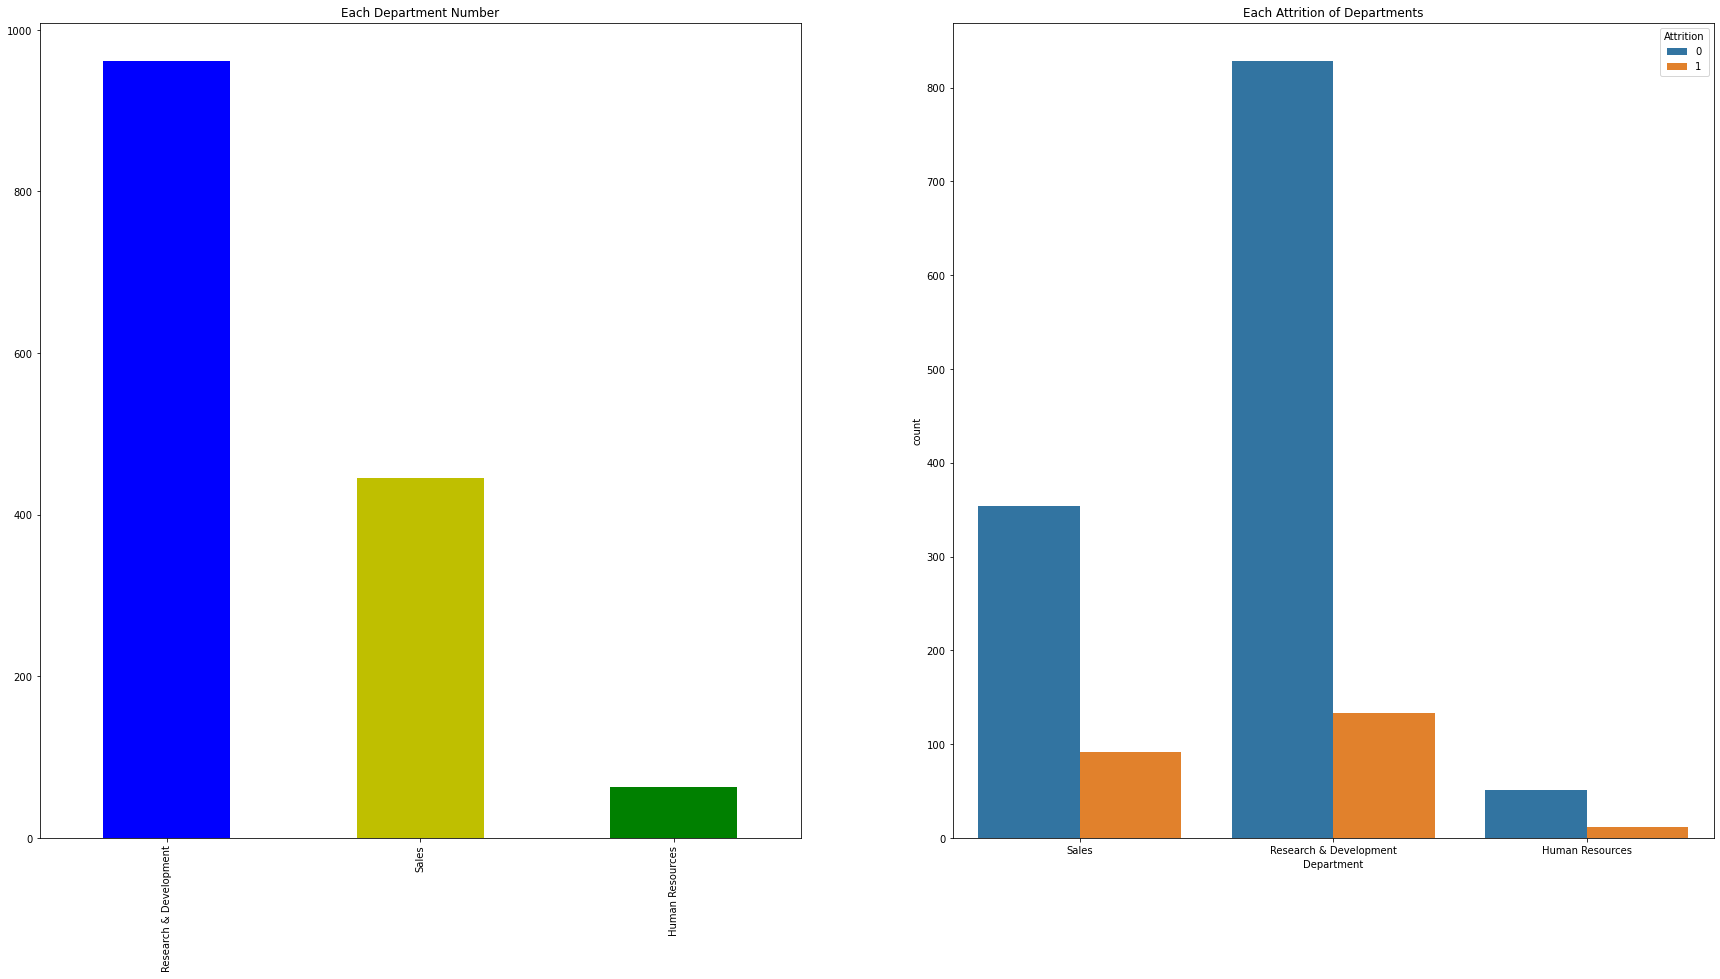

In [9]:
f, ax = plt.subplots(1,2, figsize=(30,15))


data["Department"].value_counts().plot.bar(ax=ax[0],
                                          color=['b','y','g'])
ax[0].set_title("Each Department Number")

sns.countplot('Department', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("Each Attrition of Departments")
plt.show()

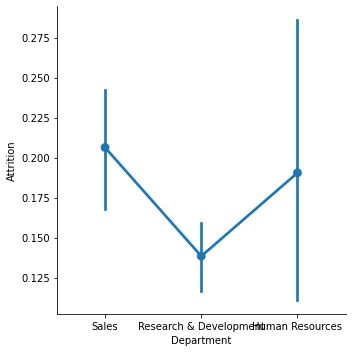

In [163]:
sns.factorplot('Department','Attrition', data=data)
plt.show()

 HumanResources = 20%<br>
 Research & Development= 13.83%<br>
 Sales = 20%<br>
 <br>
 Research & Development는 평균 퇴직 비율에 비해 3% 작고
 HumanResources와 Sales 부서는 평균 퇴직 비율에 비해 4% 높게 나타난다.

## BusinessTravel

In [131]:
data["BusinessTravel"].value_counts().to_frame()

,BusinessTravel
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [132]:
data.groupby(['BusinessTravel','Attrition'])['Attrition'].count().to_frame()

Attrition
BusinessTravel    Attrition           
Non-Travel        0                138
                  1                 12
Travel_Frequently 0                208
                  1                 69
Travel_Rarely     0                887
                  1                156

In [133]:
data.groupby(['BusinessTravel','Department'])['Department'].count().to_frame()

Department
BusinessTravel    Department                        
Non-Travel        Human Resources                  6
                  Research & Development          97
                  Sales                           47
Travel_Frequently Human Resources                 11
                  Research & Development         182
                  Sales                           84
Travel_Rarely     Human Resources                 46
                  Research & Development         682
                  Sales                          315

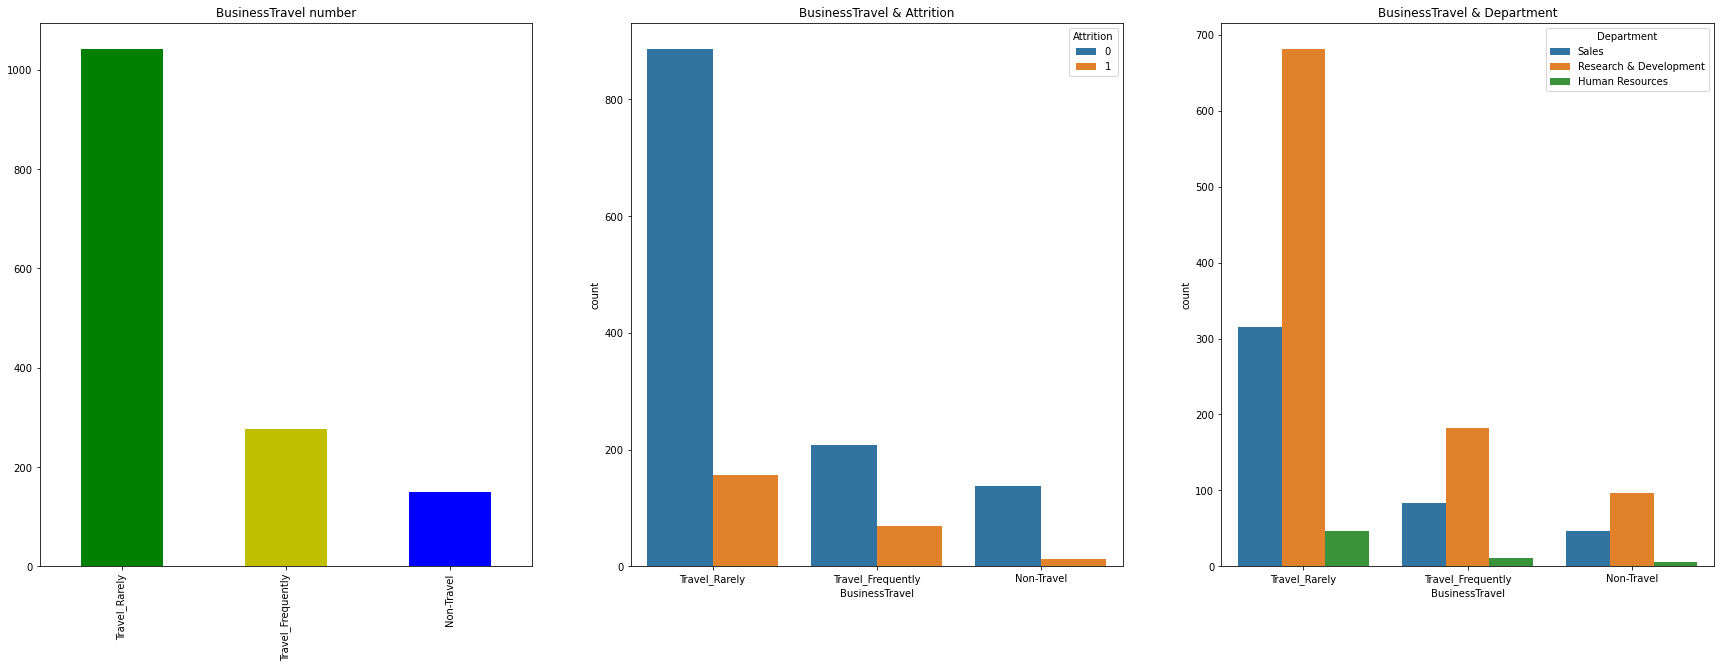

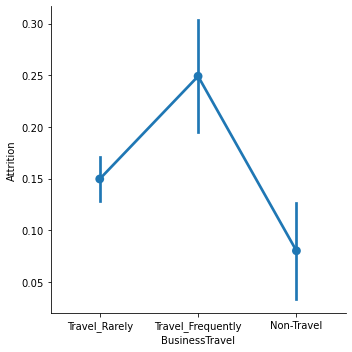

In [14]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data['BusinessTravel'].value_counts().plot.bar(ax=ax[0], color=['g','y','b'])
ax[0].set_title("BusinessTravel number")

sns.countplot('BusinessTravel',hue='Attrition', data=data, ax=ax[1])
ax[1].set_title("BusinessTravel & Attrition")

sns.countplot('BusinessTravel',hue='Department', data=data, ax=ax[2])
ax[2].set_title("BusinessTravel & Department")

sns.factorplot('BusinessTravel', 'Attrition', data=data)
plt.show()

In [13]:
ResearchDevelopment0=97/961
ResearchDevelopment1=682/961
ResearchDevelopment2=97/961

Sales0=47/446
Sales1=315/446
Sales2=84/446

HumanResource0=6/63
HumanResource1=46/63
HumanResource2=11/63

print("Research&Development: ", ResearchDevelopment0,
     ResearchDevelopment1, ResearchDevelopment2)
print("Sales: ", Sales0, Sales1,Sales2)
print("Human Resource:",HumanResource0,HumanResource1,
     HumanResource2)

Research&Development:  0.10093652445369407 0.7096774193548387 0.10093652445369407
Sales:  0.10538116591928251 0.7062780269058296 0.18834080717488788
Human Resource: 0.09523809523809523 0.7301587301587301 0.1746031746031746


출장이 빈번한 이들의 퇴사 비율이 25%로 가장 낮았으며, 출장이 전혀 없는 직장이 약 10%미만의 비율을 보이고 있다. 

업무별로 출장비율을 보았을 때, Sales, Human Resource의 출장빈도가 가장 높은 이들이 각각 18.8%, 17.46%를 차지 반면에 R&D는 10.09% 차지

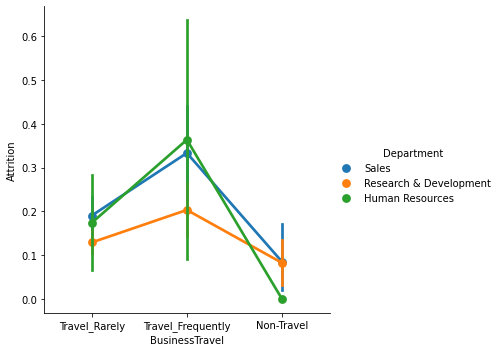

In [14]:
# 업무별로 출장회수에 따른 퇴직자의 비율 
sns.factorplot('BusinessTravel', 'Attrition', hue='Department', data=data)
plt.show()

sales, Human Resources에서 유의미한 차이가 발생.<br> 출장이 빈번한 이즉의 퇴사율이 30% 가량으로 평균의 약 2배 수준.<br>

## JobInvolvement

In [130]:
data['JobInvolvement'].value_counts().to_frame()

,JobInvolvement
3,868
2,375
4,144
1,83


Text(0.5, 1.0, 'JobInvolvement & BusinessTravel')

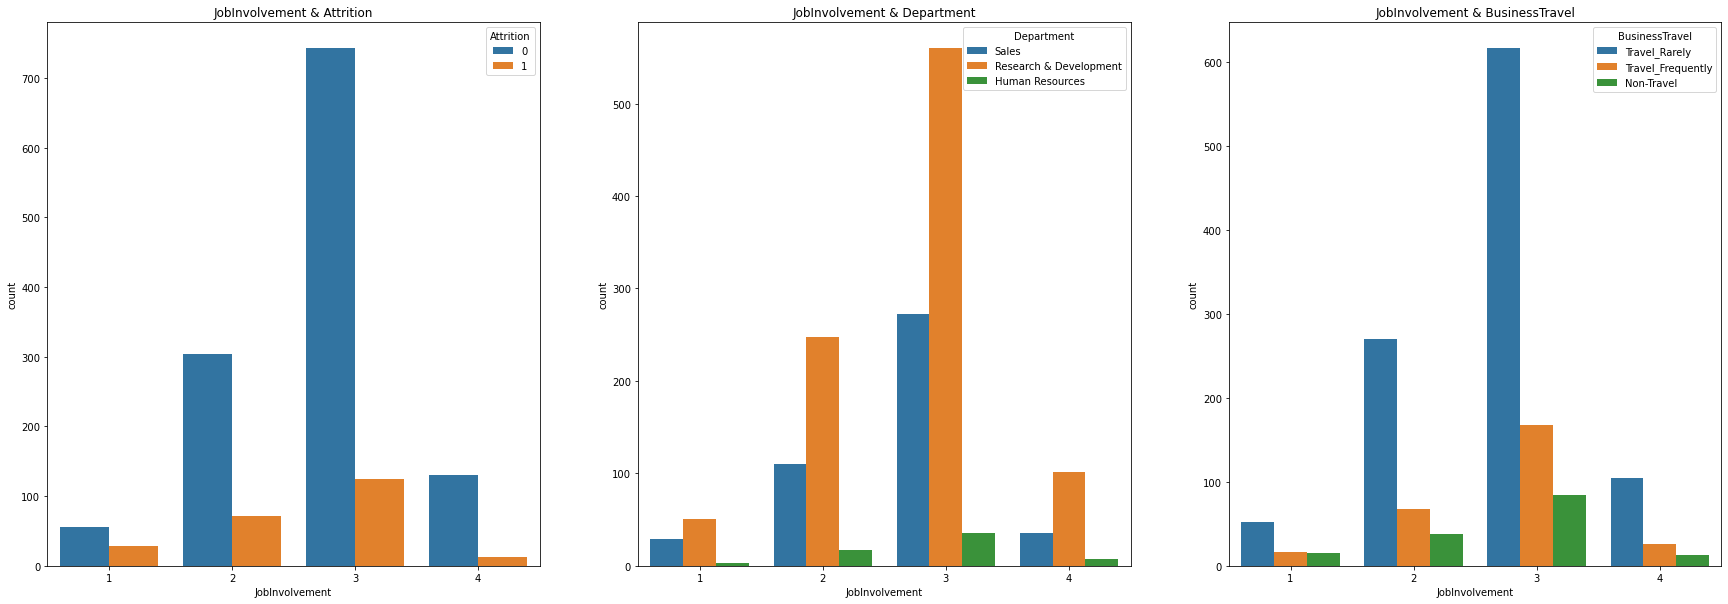

In [16]:
f, ax = plt.subplots(1,3,figsize=(30,10))

sns.countplot('JobInvolvement', hue="Attrition", data=data,ax=ax[0])
ax[0].set_title('JobInvolvement & Attrition')

sns.countplot('JobInvolvement', hue="Department", data=data,ax=ax[1])
ax[1].set_title('JobInvolvement & Department') 

sns.countplot('JobInvolvement', hue="BusinessTravel", data=data,ax=ax[2])
ax[2].set_title('JobInvolvement & BusinessTravel') # 비율이 일정.

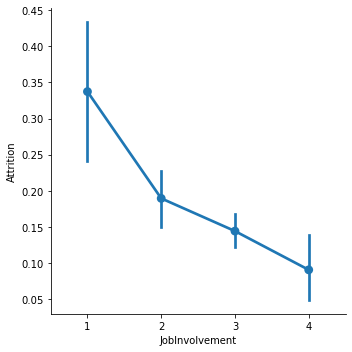

In [17]:
sns.factorplot('JobInvolvement', 'Attrition', data=data)
plt.show()

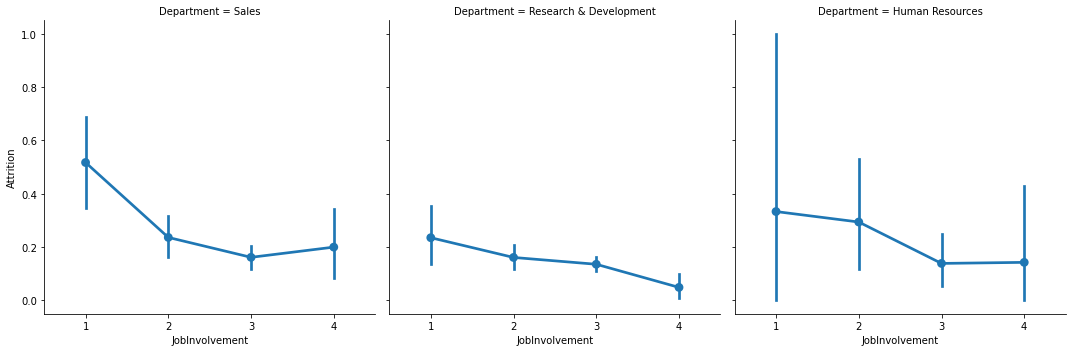

In [18]:
sns.factorplot('JobInvolvement', 'Attrition',col="Department", data=data)
plt.show() 

sales부분에서 차이가 심하게 나타남. 평균적으로 직업적 연관성이 적을수록 평균 퇴사 비율이 16%보다 높게 나타난다.

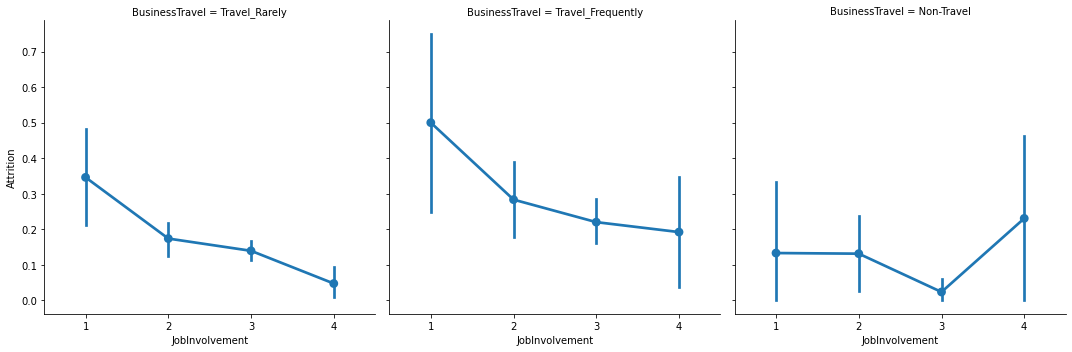

In [19]:
sns.factorplot('JobInvolvement', 'Attrition',col="BusinessTravel", data=data)
plt.show() 

출장이 드문 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다<br>
출장이 빈번한 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다.<br>
출장이 없는 경우에는 유의미한 차이가 없다. <br>
직업연관성이 적고 출장빈도가 높으면 높을수록 퇴사 비율이 증가함을 알 수 있다. 

## JobLevel (직무수준)

In [129]:
data["JobLevel"].value_counts().to_frame()

,JobLevel
1,543
2,534
3,218
4,106
5,69


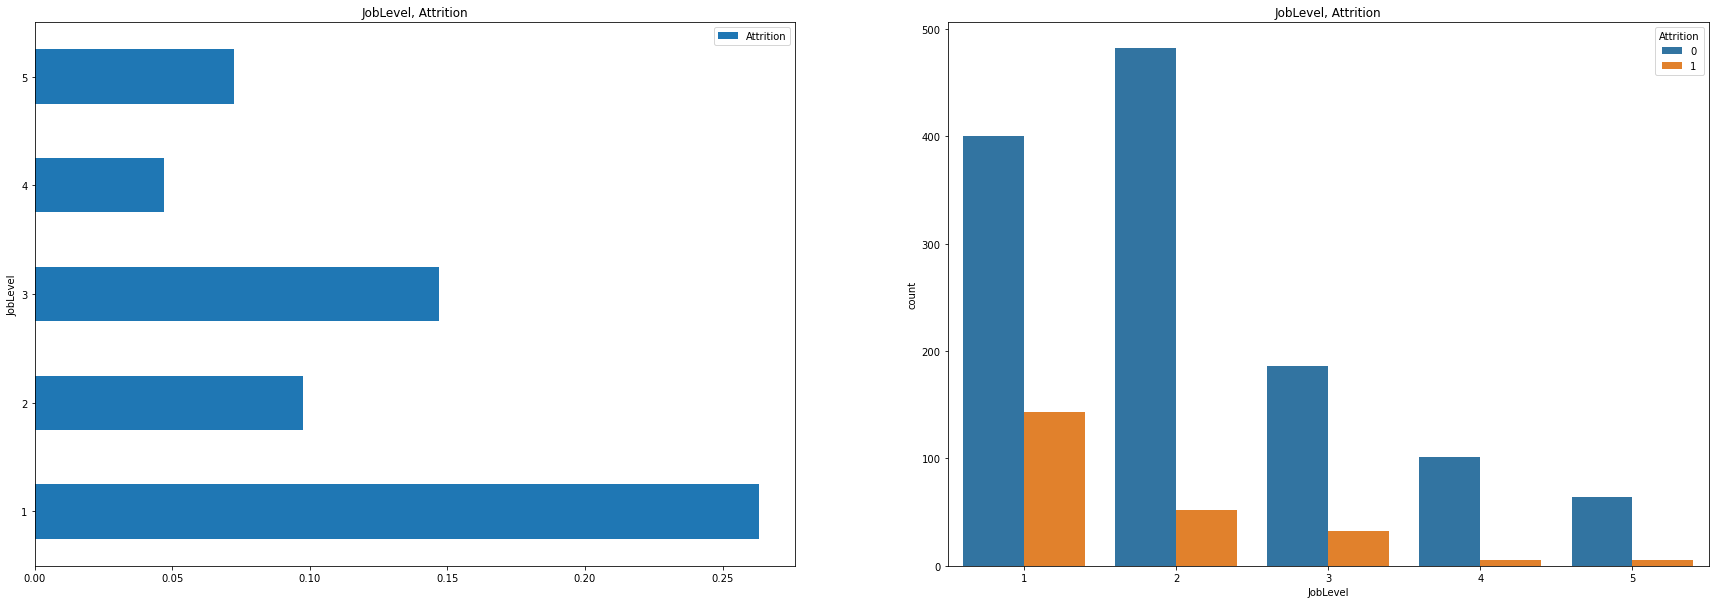

In [27]:
f, ax = plt.subplots(1,2,figsize=(30,10))

data[['Attrition','JobLevel']].groupby(['JobLevel']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title('JobLevel, Attrition') 

sns.countplot('JobLevel', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("JobLevel, Attrition")
plt.show()

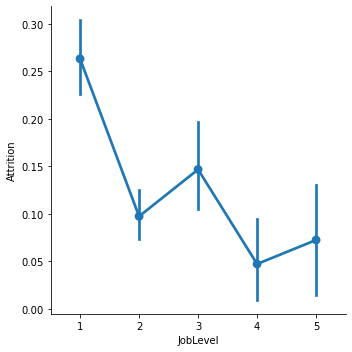

In [36]:
sns.factorplot('JobLevel', 'Attrition', data=data)
plt.show() 

JobLevel 이 낮은 경우 퇴사율이 유의미한 차이를 보이고 있다. <br>

In [128]:
data.groupby(['BusinessTravel','JobLevel'])['JobLevel'].count().to_frame()

JobLevel
BusinessTravel    JobLevel          
Non-Travel        1               48
                  2               67
                  3               20
                  4               11
                  5                4
Travel_Frequently 1              104
                  2              104
                  3               40
                  4               19
                  5               10
Travel_Rarely     1              391
                  2              363
                  3              158
                  4               76
                  5               55

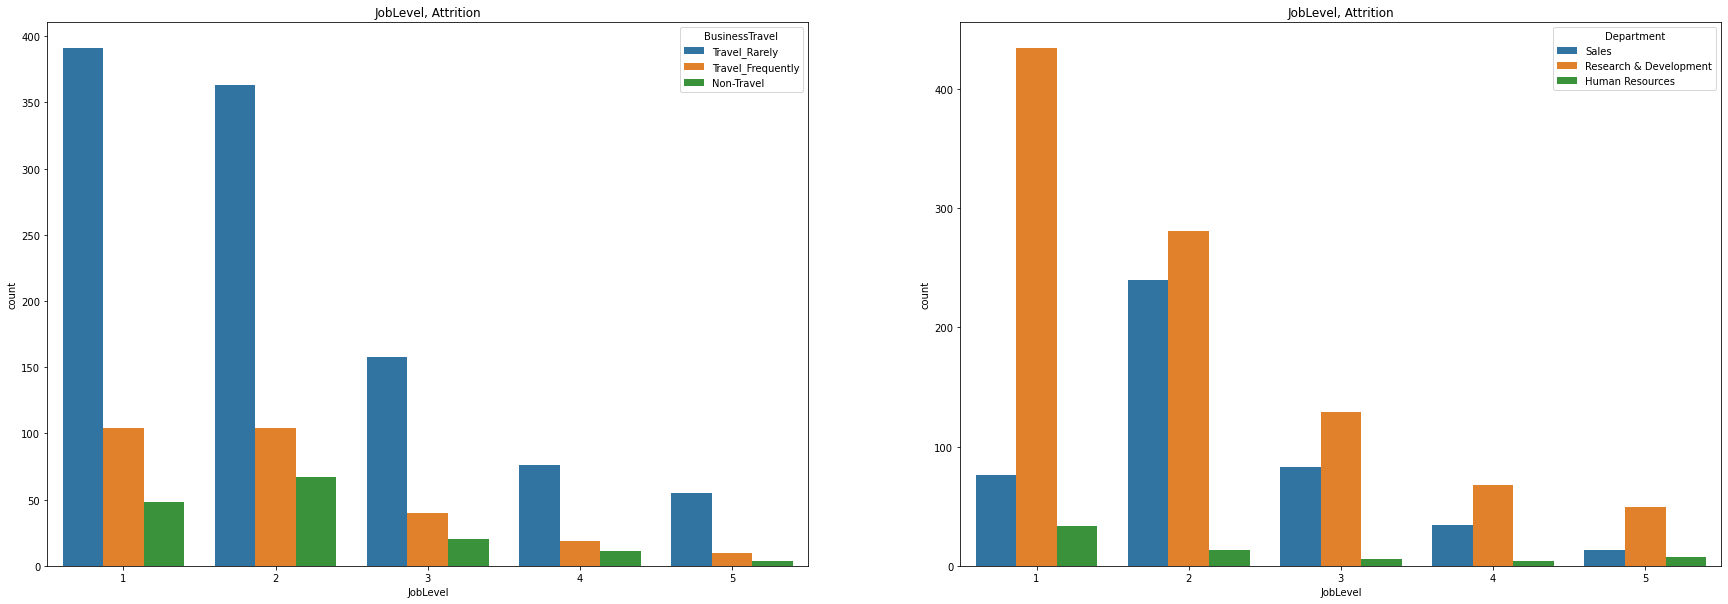

In [35]:
f, ax = plt.subplots(1,2,figsize=(30,10))

sns.countplot('JobLevel', hue="BusinessTravel", data=data, ax=ax[0])
ax[0].set_title("JobLevel, Attrition")


sns.countplot('JobLevel', hue="Department", data=data, ax=ax[1])
ax[1].set_title("JobLevel, Attrition")
plt.show()


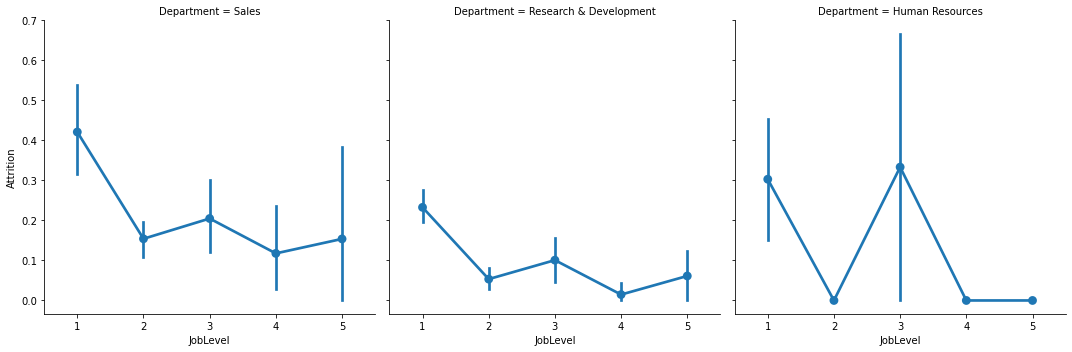

In [39]:
sns.factorplot('JobLevel', 'Attrition',col="Department", data=data)
plt.show() 

모든 부서에서 JobLevel이 1인 경우 퇴사율이 낮으며, 특이점으로 Human Resources에서는 3의 JobLevel에서 1과 유사한 정도의 퇴사율이 나타나고 있다. <br>
출장의 빈도는 모든 직종과 직업 지위에 따라 유사한 변화를 보이고 있다. 

## JobRole (직무역할)

In [127]:
data["JobRole"].value_counts().to_frame()

,JobRole
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [126]:
data.groupby(['JobRole','Department'])['Department'].count().to_frame()

Department
JobRole                   Department                        
Healthcare Representative Research & Development         131
Human Resources           Human Resources                 52
Laboratory Technician     Research & Development         259
Manager                   Human Resources                 11
                          Research & Development          54
                          Sales                           37
Manufacturing Director    Research & Development         145
Research Director         Research & Development          80
Research Scientist        Research & Development         292
Sales Executive           Sales                          326
Sales Representative      Sales                           83

Sales=[Sales Executive, Sales Representative, Manager ]<br>
Research & Development =[Research Director,Research Scientist, Laboratory Technician, Manufacturing Director ,
                           Healthcare Representative ,Manager ]<br>
Human Resources =[Human Resources ,Manager]<br>

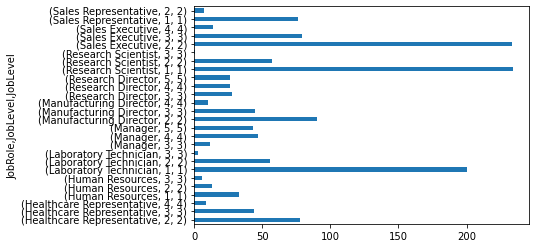

In [122]:
data.groupby(['JobRole','JobLevel'])['JobLevel'].value_counts().plot.barh()
plt.show()

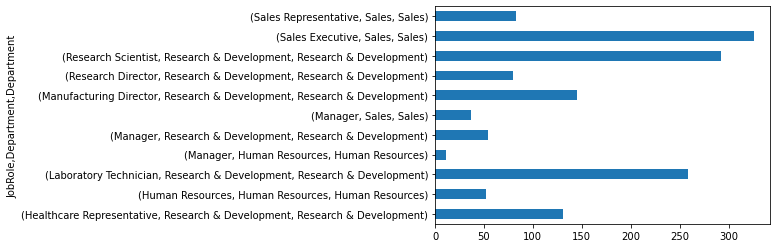

In [93]:

data.groupby(['JobRole','Department'])['Department'].value_counts().plot.barh()
plt.show()

Text(0.5, 1.0, "Human Resources's JobRole")

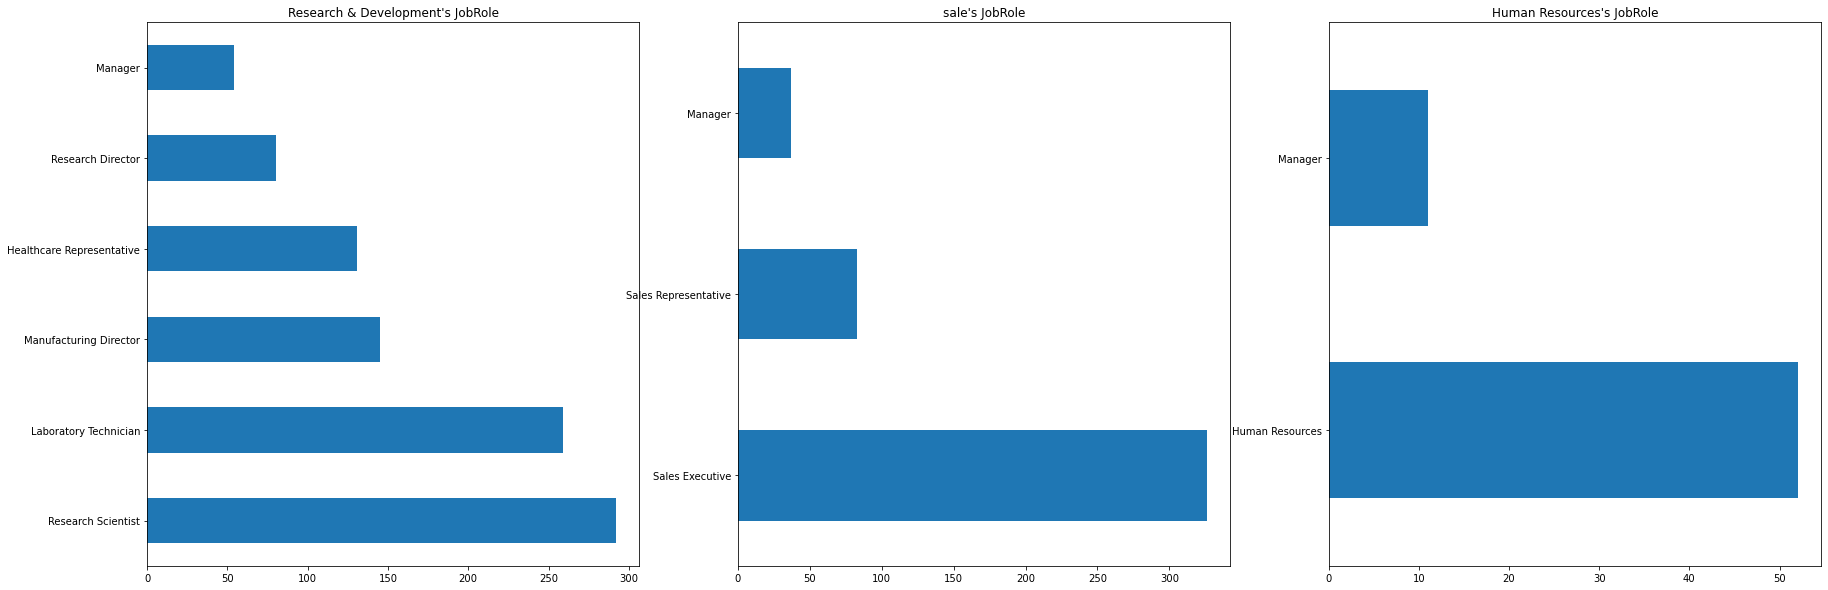

In [94]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data[data['Department']=="Research & Development"]['JobRole'].value_counts().plot.barh(ax=ax[0])
ax[0].set_title("Research & Development's JobRole")

data[data['Department']=="Sales"]['JobRole'].value_counts().plot.barh(ax=ax[1])
ax[1].set_title("sale's JobRole")

data[data['Department']=="Human Resources"]['JobRole'].value_counts().plot.barh(ax=ax[2])
ax[2].set_title("Human Resources's JobRole")

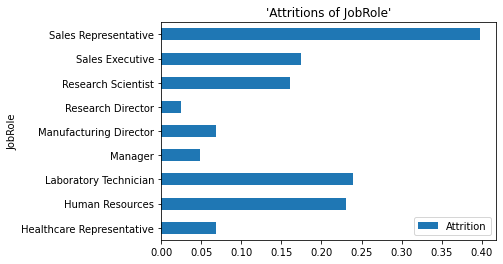

In [98]:
data[['Attrition','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'Attritions of JobRole'")
plt.show()


#### Laboratory Technician 

#### Sales Representative

#### Human Resources

각 업무에서 job level이 1에 해당하는 직업이 20% 이상이었으며, Sales Representative의 경우 40% 육박하였다. (jobLevel 1의 비율이 91.5%)

Sales=[Sales Executive(2,3,4), Sales Representative(1,2), Manager(3,4,5) ]<br>
Research & Development =[Research Director(3,4,5), Research Scientist(1,2,3), Laboratory Technician(1,2,3),<br>'
     Manufacturing Director(2,3,4) ,Healthcare Representative(2,3,4) ,Manager(3,4,5) ]<br>
Human Resources =[Human Resources(1,2,3) ,Manager(3,4,5)]<br>

JobLevel 과 JobRole에서 Attrition과의 연관성이 매우 높은 것으로 나타난다.

## OverTime(초과근무)

In [82]:
data["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

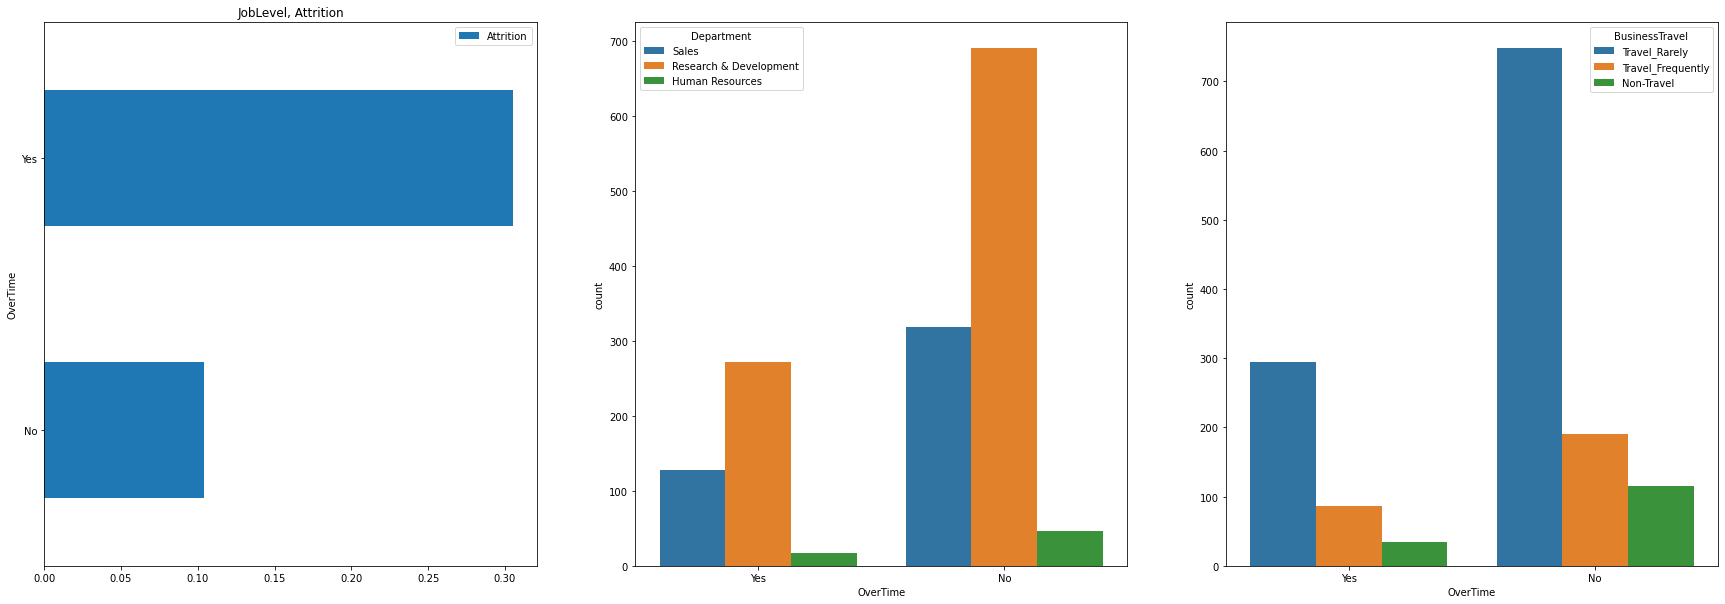

In [110]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data[['Attrition','OverTime']].groupby(['OverTime']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title("Attrition & OverTime") 

sns.countplot("OverTime", hue="Department", data=data, ax=ax[1])


sns.countplot("OverTime", hue="BusinessTravel", data=data, ax=ax[2])


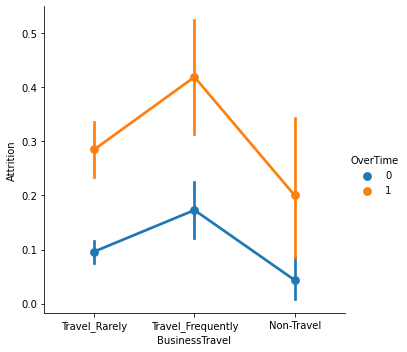

In [117]:
data["OverTime"].replace("Yes", 1 , inplace=True)
data["OverTime"].replace("No", 0 , inplace=True)

sns.factorplot('BusinessTravel','Attrition', hue="OverTime", data=data)
plt.show()

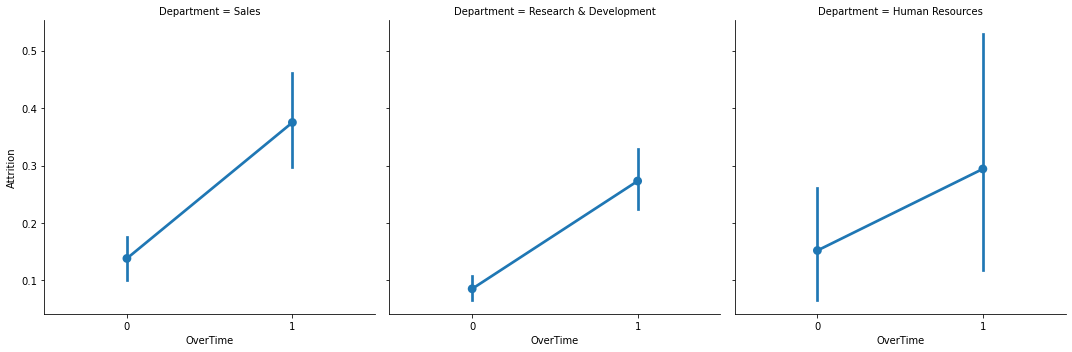

In [120]:
sns.factorplot("OverTime",'Attrition', col='Department', data=data)
plt.show()

 초과 근무가 있을 경우 최사 비율이 30%, 초과근무가 없는 경우 퇴사비율이 10%로 3 배가량 차이가 난다. 
 
 출장 횟수가 많을 수록, 초과근무도 증가하며, 출장횟수와 초과근무가 많을 수록 퇴사자들도 증가함. 각 부서별로도 초과근무가 있으면, 퇴사비율이 증가하는 경향이 발생. 

## PerformanceRating

In [139]:
data['PerformanceRating'].value_counts().to_frame()
# Excellent 와  #Outstanding  만 존재. 유의미한 차이가 있을까?

,PerformanceRating
3,1244
4,226


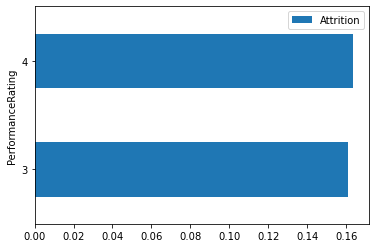

In [141]:
data[["Attrition",'PerformanceRating']].groupby(['PerformanceRating']).mean().plot.barh()
plt.show()
#유의미한 차이 X!!!

## TrainingTimesLastYear

In [142]:
data['TrainingTimesLastYear'].value_counts().to_frame()

,TrainingTimesLastYear
2,547
3,491
4,123
5,119
1,71
6,65
0,54


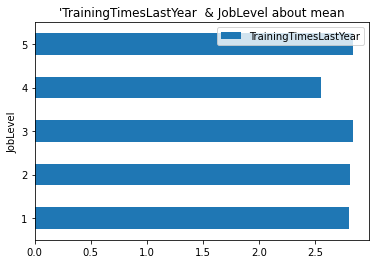

In [164]:
data[['TrainingTimesLastYear','JobLevel']].groupby(['JobLevel']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  & JobLevel about mean")
plt.show()

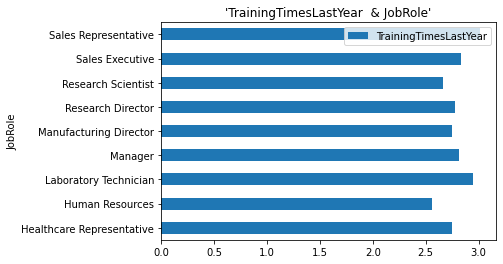

In [148]:
data[['TrainingTimesLastYear','JobRole']].groupby(['JobRole']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  & JobRole about mean")
plt.show()

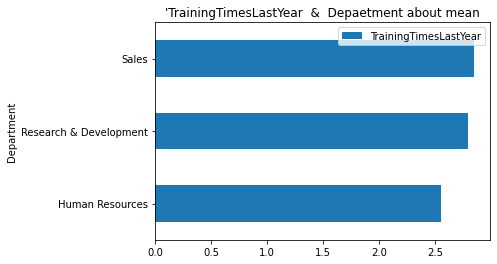

In [151]:
data[['TrainingTimesLastYear','Department']].groupby(['Department']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  &  Depaetment about mean")
plt.show()

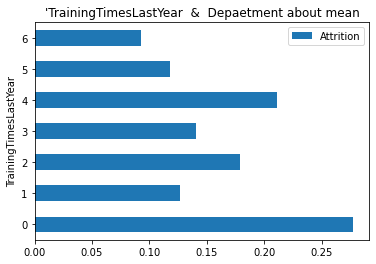

In [153]:
data[['TrainingTimesLastYear','Attrition']].groupby(['TrainingTimesLastYear']).mean().plot.barh() 
plt.title("'TrainingTimesLastYear  &  Depaetment about mean")
plt.show()

지난 학습 기간이 0인 그룹이 퇴사 비율이 가장 높았다. 그다음이 4시간인 이들이다. 

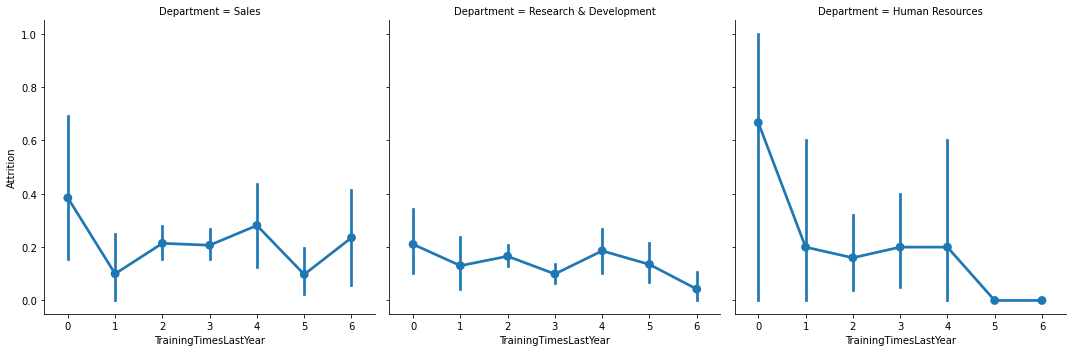

In [168]:
sns.factorplot('TrainingTimesLastYear','Attrition',col='Department',data=data)

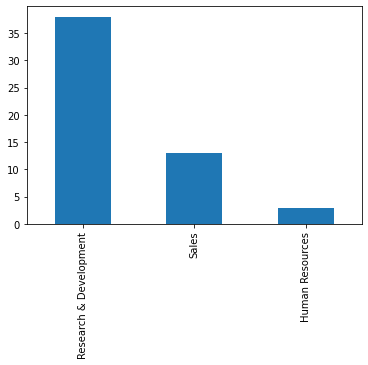

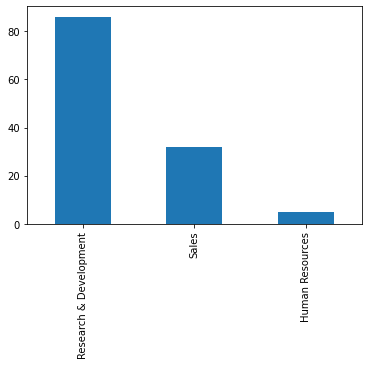

In [166]:
data[data['TrainingTimesLastYear']==0]['Department'].value_counts().plot.bar()
plt.show()
data[data['TrainingTimesLastYear']==4]['Department'].value_counts().plot.bar()
plt.show()

직무 역활, 직무 수준, 부서에서의 평균 트레이닝 시간이 대부분 비슷하다. 
0시간 4시간의 비중이 R&D에 많은 것은 단지 R&D의 직무 인원이 많기 때문이다.
유의미한 차이가 있지는 않는 것 같다. 아마 연차와 연관이 있지 않을까??
